In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime

# 1. Data Collection 

In [3]:
now = datetime.now()

ticker = 'AMZN'
start = datetime(now.year-10, now.month, now.day)
end = now
df = yf.download(ticker,start,end,auto_adjust=True)
df.columns = df.columns.get_level_values(0)
df

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Date,,,,,
2015-11-02,31.417500,31.431499,31.020500,31.356501,56330000
2015-11-03,31.265499,31.494499,31.100000,31.476500,64938000
2015-11-04,32.047501,32.296501,31.367500,31.388000,96810000
2015-11-05,32.782501,32.849998,32.154499,32.355000,94476000
2015-11-06,32.968498,33.112999,32.599998,32.750000,81844000
...,...,...,...,...,...
2025-10-24,224.210007,225.399994,221.899994,221.970001,38685100
2025-10-27,226.970001,228.399994,225.539993,227.660004,38267000
2025-10-28,229.250000,231.490005,226.210007,228.220001,47100000


# 2. Data Exploration & Visualization

In [4]:
type(df)

pandas.core.frame.DataFrame

In [5]:
df.shape

(2514, 5)

In [6]:
df.isna().sum()

Price
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

In [7]:
df.describe()

Price,Close,High,Low,Open,Volume
count,2514.000000,2514.000000,2514.000000,2514.000000,2.514000e+03
mean,117.228645,118.583960,115.797539,117.254534,7.368342e+07
std,56.948357,57.597729,56.281019,56.975856,3.900710e+07
min,24.103500,24.674999,23.700001,23.900499,1.500750e+07
25%,77.246126,78.492626,75.967999,77.375877,4.826200e+07
50%,107.574001,109.615002,106.101501,107.695004,6.336700e+07
75%,164.350872,166.150257,162.647129,164.600372,8.809620e+07
max,242.059998,242.520004,238.029999,239.020004,3.313000e+08


In [8]:
df.dtypes

Price
Close     float64
High      float64
Low       float64
Open      float64
Volume      int64
dtype: object

In [9]:
df = df.reset_index()

In [10]:
df

Price,Date,Close,High,Low,Open,Volume
0,2015-11-02,31.417500,31.431499,31.020500,31.356501,56330000
1,2015-11-03,31.265499,31.494499,31.100000,31.476500,64938000
2,2015-11-04,32.047501,32.296501,31.367500,31.388000,96810000
3,2015-11-05,32.782501,32.849998,32.154499,32.355000,94476000
4,2015-11-06,32.968498,33.112999,32.599998,32.750000,81844000
...,...,...,...,...,...,...
2509,2025-10-24,224.210007,225.399994,221.899994,221.970001,38685100
2510,2025-10-27,226.970001,228.399994,225.539993,227.660004,38267000
2511,2025-10-28,229.250000,231.490005,226.210007,228.220001,47100000
2512,2025-10-29,230.300003,232.820007,227.759995,231.669998,52036200


ERROR! Session/line number was not unique in database. History logging moved to new session 5


Text(0, 0.5, 'Close price')

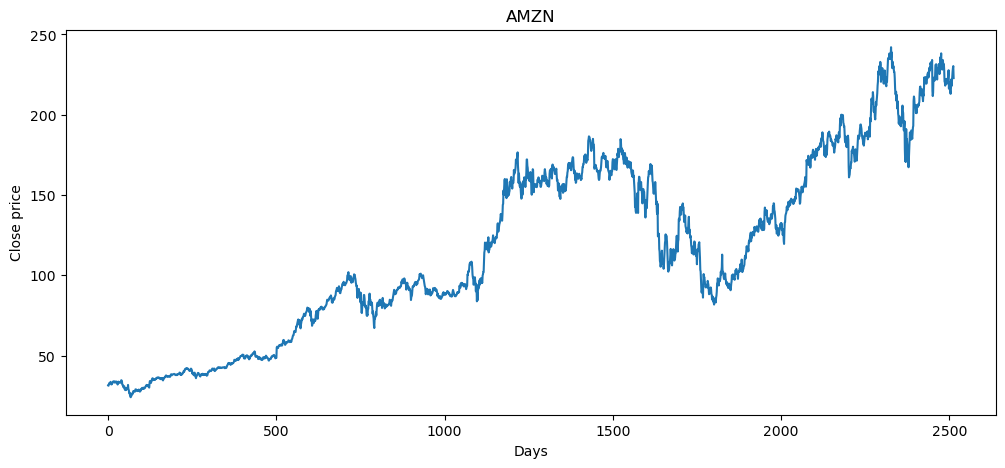

In [11]:
plt.figure(figsize=(12,5))
plt.plot(df.Close)
plt.title(ticker)
plt.xlabel('Days')
plt.ylabel('Close price')

# 3. Feature Engineering

In [12]:
df1 = pd.DataFrame([10,20,30,40,50,60,70,80,90,100])
df1

,0
0,10
1,20
2,30
3,40
4,50
5,60
6,70
7,80
8,90
9,100


In [13]:
df1['MA_5'] = df1.rolling(5).mean()
df1

,0,MA_5
0,10,NaN
1,20,NaN
2,30,NaN
3,40,NaN
4,50,30.0
5,60,40.0
6,70,50.0
7,80,60.0
8,90,70.0
9,100,80.0


### 100 days Moving Average

In [14]:
df['MA_100'] = df['Close'].rolling(100).mean()

In [15]:
df

Price,Date,Close,High,Low,Open,Volume,MA_100
0,2015-11-02,31.417500,31.431499,31.020500,31.356501,56330000,NaN
1,2015-11-03,31.265499,31.494499,31.100000,31.476500,64938000,NaN
2,2015-11-04,32.047501,32.296501,31.367500,31.388000,96810000,NaN
3,2015-11-05,32.782501,32.849998,32.154499,32.355000,94476000,NaN
4,2015-11-06,32.968498,33.112999,32.599998,32.750000,81844000,NaN
...,...,...,...,...,...,...,...
2509,2025-10-24,224.210007,225.399994,221.899994,221.970001,38685100,222.9035
2510,2025-10-27,226.970001,228.399994,225.539993,227.660004,38267000,223.1009
2511,2025-10-28,229.250000,231.490005,226.210007,228.220001,47100000,223.3143
2512,2025-10-29,230.300003,232.820007,227.759995,231.669998,52036200,223.4816


Text(0, 0.5, 'Close price')

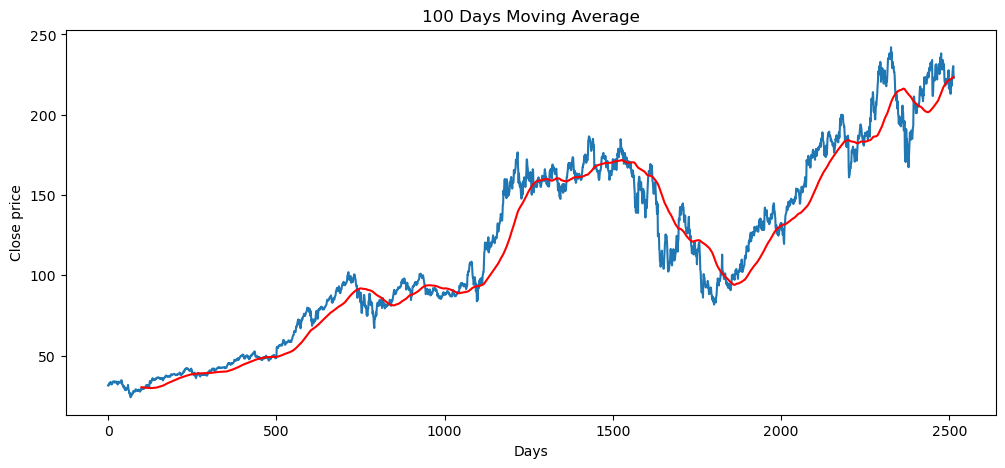

In [16]:
plt.figure(figsize=(12,5))
plt.plot(df.Close)
plt.plot(df['MA_100'],'r')
plt.title('100 Days Moving Average')
plt.xlabel('Days')
plt.ylabel('Close price')



### 200 days Moving Average

In [17]:
df['MA_200'] = df['Close'].rolling(200).mean()
df.head(300)

Price,Date,Close,High,Low,Open,Volume,MA_100,MA_200
0,2015-11-02,31.417500,31.431499,31.020500,31.356501,56330000,NaN,NaN
1,2015-11-03,31.265499,31.494499,31.100000,31.476500,64938000,NaN,NaN
2,2015-11-04,32.047501,32.296501,31.367500,31.388000,96810000,NaN,NaN
3,2015-11-05,32.782501,32.849998,32.154499,32.355000,94476000,NaN,NaN
4,2015-11-06,32.968498,33.112999,32.599998,32.750000,81844000,NaN,NaN
...,...,...,...,...,...,...,...,...
295,2017-01-04,37.859001,37.984001,37.709999,37.919498,50210000,39.079565,36.811250
296,2017-01-05,39.022499,39.119999,38.013000,38.077499,116602000,39.083510,36.866242
297,2017-01-06,39.799500,39.972000,38.924000,39.118000,119724000,39.097260,36.922832
298,2017-01-09,39.846001,40.088501,39.588501,39.900002,68922000,39.113700,36.976325


Text(0, 0.5, 'Close price')

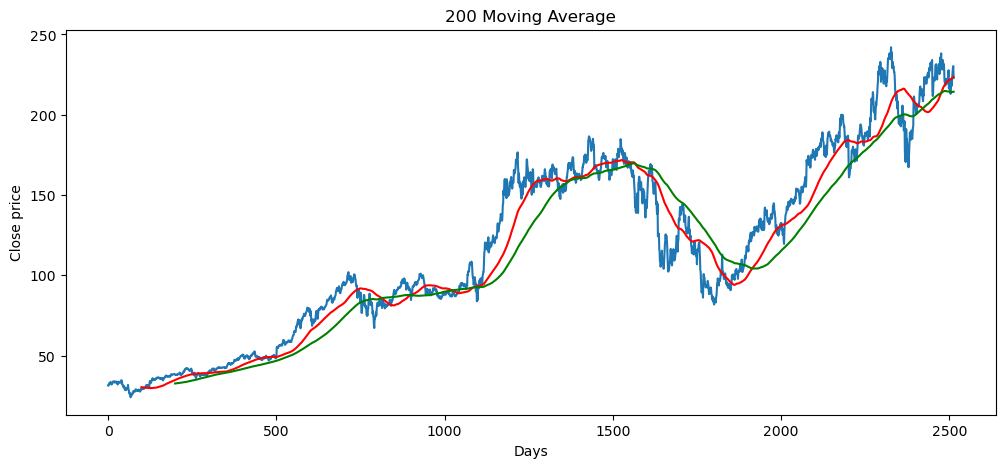

In [18]:
plt.figure(figsize=(12,5))
plt.plot(df.Close)
plt.plot(df['MA_100'],'r')
plt.plot(df['MA_200'],'g')
plt.title('200 Moving Average')
plt.xlabel('Days')
plt.ylabel('Close price')

### Calculamting % changed in each tading session

In [19]:
df['Percentage_changed'] = df.Close.pct_change()
df[['Close', 'Percentage_changed']]

Price,Close,Percentage_changed
0,31.417500,NaN
1,31.265499,-0.004838
2,32.047501,0.025012
3,32.782501,0.022935
4,32.968498,0.005674
...,...,...
2509,224.210007,0.014112
2510,226.970001,0.012310
2511,229.250000,0.010045
2512,230.300003,0.004580


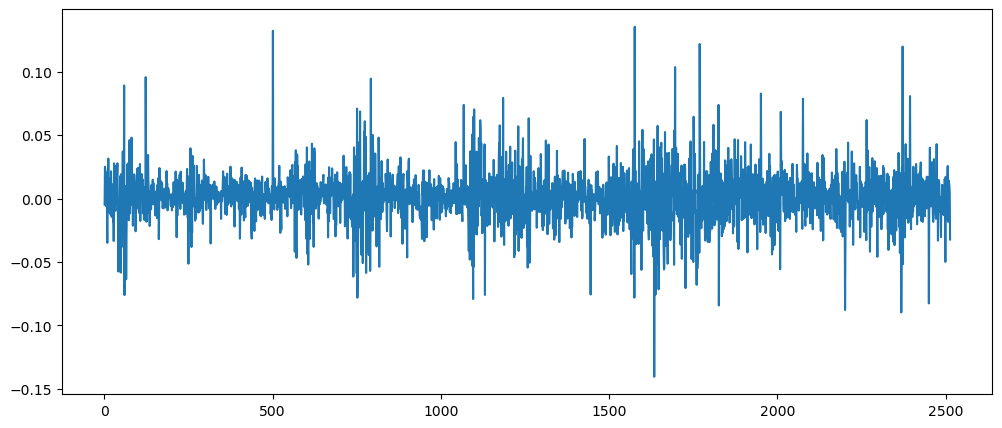

In [20]:
plt.figure(figsize=(12,5))
plt.plot(df['Percentage_changed'])

In [21]:
df.shape

(2514, 9)

# Splitting data into Training & Testing datasets

In [23]:
data_training = pd.DataFrame(df.Close[0:int(len(df)*0.7)])
data_testing = pd.DataFrame(df.Close[int(len(df)*0.7):int(len(df))])


print(data_training)
print(data_testing)

           Close
0      31.417500
1      31.265499
2      32.047501
3      32.782501
4      32.968498
...          ...
1754  115.250000
1755  119.320000
1756  119.820000
1757  120.599998
1758  115.660004

[1759 rows x 1 columns]
           Close
1759  110.959999
1760  103.410004
1761  102.440002
1762   96.790001
1763   92.120003
...          ...
2509  224.210007
2510  226.970001
2511  229.250000
2512  230.300003
2513  222.860001

[755 rows x 1 columns]


In [ ]:
# Scaling down the data between 0 and 1

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [35]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.04501837],
       [0.04408279],
       [0.04889609],
       ...,
       [0.58914427],
       [0.59394524],
       [0.56353909]], shape=(1759, 1))

In [36]:
type(data_training_array)

numpy.ndarray

In [38]:
data_training_array.shape




(1759, 1)

# 5. Sequence Creation

In [43]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)
    

In [50]:
y_train.shape

(1659,)

# 6. Model Building

In [54]:
import tensorflow as tf
print(tf.__version__)

2.20.0


In [57]:
# ML Model 
from keras.models import Sequential
from keras.layers import Dense, LSTM, Input

In [58]:
model = Sequential()

model.add(Input(shape = (100, 1)))
model.add(LSTM(units=128, activation='tanh', return_sequences=True))
model.add(LSTM(units=64))
model.add(Dense(25))
model.add(Dense(1))

# 7. Model Training

In [60]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 0.0100
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0010    
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 8.9613e-04
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 9.4815e-04
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 8.0524e-04
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 7.3392e-04
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 7.0659e-04
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 8.0215e-04
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 9.2269e-04
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 5.9819e-04
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 6.1262e-04
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 5.6120e-04
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 5.4340e-04
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 5.0315e-04
Epoch 15/50
52/52 ━

In [61]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [62]:
# Save the trained model
model.save('stock_prediction_model.keras')

# 8. Preparing Test Data

In [63]:
data_testing

,Close
1759,110.959999
1760,103.410004
1761,102.440002
1762,96.790001
1763,92.120003
...,...
2509,224.210007
2510,226.970001
2511,229.250000
2512,230.300003


In [65]:
past_100_days = data_training.tail(100)

In [66]:
past_100_days

,Close
1659,124.790001
1660,123.000000
1661,121.180000
1662,116.150002
1663,109.650002
...,...
1754,115.250000
1755,119.320000
1756,119.820000
1757,120.599998


In [68]:
final_df = pd.concat([past_100_days,data_testing], ignore_index=True)
final_df

,Close
0,124.790001
1,123.000000
2,121.180000
3,116.150002
4,109.650002
...,...
850,224.210007
851,226.970001
852,229.250000
853,230.300003


In [70]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.26816027],
       [0.25698952],
       [0.24563156],
       [0.21424115],
       [0.173677  ],
       [0.13635796],
       [0.12787068],
       [0.16132051],
       [0.13629558],
       [0.1522716 ],
       [0.16762357],
       [0.16930852],
       [0.19108839],
       [0.21617574],
       [0.19595608],
       [0.15963556],
       [0.16912131],
       [0.15220918],
       [0.17311532],
       [0.19770345],
       [0.20288319],
       [0.21536447],
       [0.21043436],
       [0.18678233],
       [0.17099352],
       [0.17835748],
       [0.1797928 ],
       [0.1980155 ],
       [0.19932603],
       [0.22709685],
       [0.25555415],
       [0.26716175],
       [0.25336994],
       [0.24538193],
       [0.20587867],
       [0.24432103],
       [0.25249625],
       [0.33156514],
       [0.33431104],
       [0.32663508],
       [0.36008491],
       [0.37911887],
       [0.36807292],
       [0.35939843],
       [0.34953821],
       [0.37986772],
       [0.36707439],
       [0.385

In [71]:
input_data.shape


(855, 1)

In [72]:
x_test = []
y_test = []

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i, 0])

In [73]:
x_test, y_test = np.array(x_test), np.array(y_test)

In [74]:
x_test

array([[[0.26816027],
        [0.25698952],
        [0.24563156],
        ...,
        [0.23714429],
        [0.24201198],
        [0.21118325]],

       [[0.25698952],
        [0.24563156],
        [0.21424115],
        ...,
        [0.24201198],
        [0.21118325],
        [0.18185222]],

       [[0.24563156],
        [0.21424115],
        [0.173677  ],
        ...,
        [0.21118325],
        [0.18185222],
        [0.13473542]],

       ...,

       [[0.78688221],
        [0.82220425],
        [0.84348476],
        ...,
        [0.86913379],
        [0.88860465],
        [0.90582878]],

       [[0.82220425],
        [0.84348476],
        [0.84741639],
        ...,
        [0.88860465],
        [0.90582878],
        [0.92005743]],

       [[0.84348476],
        [0.84741639],
        [0.81989515],
        ...,
        [0.90582878],
        [0.92005743],
        [0.92661012]]], shape=(755, 100, 1))

# 9. Making Predictions

In [75]:
y_predicted = model.predict(x_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


In [76]:
y_predicted

array([[0.23188692],
       [0.20792449],
       [0.17302604],
       [0.15280423],
       [0.1292026 ],
       [0.1047314 ],
       [0.08433619],
       [0.07696311],
       [0.07340233],
       [0.07024916],
       [0.05916097],
       [0.07479443],
       [0.09977666],
       [0.10988751],
       [0.11363588],
       [0.10955347],
       [0.10009152],
       [0.09230581],
       [0.08423872],
       [0.08166057],
       [0.08355786],
       [0.08372943],
       [0.08483328],
       [0.08175336],
       [0.08934504],
       [0.09287716],
       [0.09060904],
       [0.0804774 ],
       [0.06671828],
       [0.05863168],
       [0.05927012],
       [0.05830804],
       [0.0607855 ],
       [0.06740587],
       [0.06978391],
       [0.06277794],
       [0.0555057 ],
       [0.04439585],
       [0.03766762],
       [0.03793262],
       [0.03283349],
       [0.03178717],
       [0.02703859],
       [0.02063248],
       [0.02126515],
       [0.02265592],
       [0.02752413],
       [0.029

In [77]:
y_predicted = scaler.inverse_transform(y_predicted.reshape(-1,1)).flatten()
y_test = scaler.inverse_transform(y_test.reshape(-1,1)).flatten()

In [78]:
y_predicted

array([118.97756 , 115.13782 , 109.54569 , 106.30535 , 102.52342 ,
        98.60216 ,  95.33404 ,  94.15257 ,  93.58199 ,  93.07672 ,
        91.29995 ,  93.80505 ,  97.80821 ,  99.428375, 100.029015,
        99.37485 ,  97.858665,  96.611084,  95.31841 ,  94.90529 ,
        95.209305,  95.23681 ,  95.41368 ,  94.92016 ,  96.13665 ,
        96.70264 ,  96.339195,  94.7157  ,  92.51093 ,  91.21513 ,
        91.317444,  91.163284,  91.56027 ,  92.62112 ,  93.002174,
        91.87954 ,  90.71423 ,  88.93399 ,  87.85586 ,  87.89832 ,
        87.081245,  86.913574,  86.152664,  85.12615 ,  85.22752 ,
        85.45038 ,  86.23046 ,  86.57493 ,  85.96749 ,  86.428474,
        87.39077 ,  89.00073 ,  92.10433 ,  94.33649 ,  96.62475 ,
        97.07251 ,  96.768585,  95.76558 ,  96.58764 ,  97.51413 ,
        97.59194 ,  97.87642 ,  98.93917 , 100.97252 , 101.51966 ,
       102.71478 , 104.36522 , 108.970924, 107.27073 , 104.984634,
       103.69759 , 102.29699 , 100.816956,  99.78489 , 100.126

In [79]:
y_test

array([110.95999908, 103.41000366, 102.44000244,  96.79000092,
        92.12000275,  89.30000305,  90.98000336,  90.52999878,
        89.98000336,  86.13999939,  96.62999725, 100.79000092,
        98.48999786,  98.94000244,  97.12000275,  94.84999847,
        94.13999939,  92.45999908,  93.19999695,  94.12999725,
        93.41000366,  93.94999695,  92.41999817,  96.54000092,
        95.5       ,  94.12999725,  91.01000214,  88.25      ,
        88.45999908,  90.34999847,  89.08999634,  90.55000305,
        92.48999786,  91.58000183,  88.44999695,  87.86000061,
        84.91999817,  85.19000244,  86.76999664,  83.79000092,
        85.25      ,  83.04000092,  81.81999969,  84.18000031,
        84.        ,  85.81999969,  85.13999939,  83.12000275,
        86.08000183,  87.36000061,  89.87000275,  95.08999634,
        95.26999664,  98.12000275,  96.05000305,  95.45999908,
        93.68000031,  97.25      ,  97.51999664,  96.31999969,
        97.18000031,  99.22000122, 102.23999786, 100.55

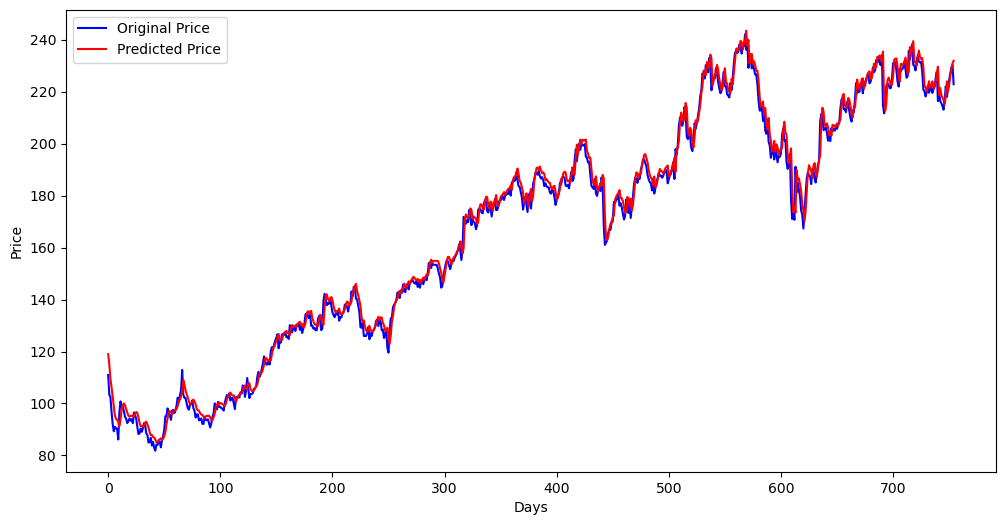

In [87]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b' ,label='Original Price')
plt.plot(y_predicted, 'r',label='Predicted Price')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()

(450.0, 750.0)

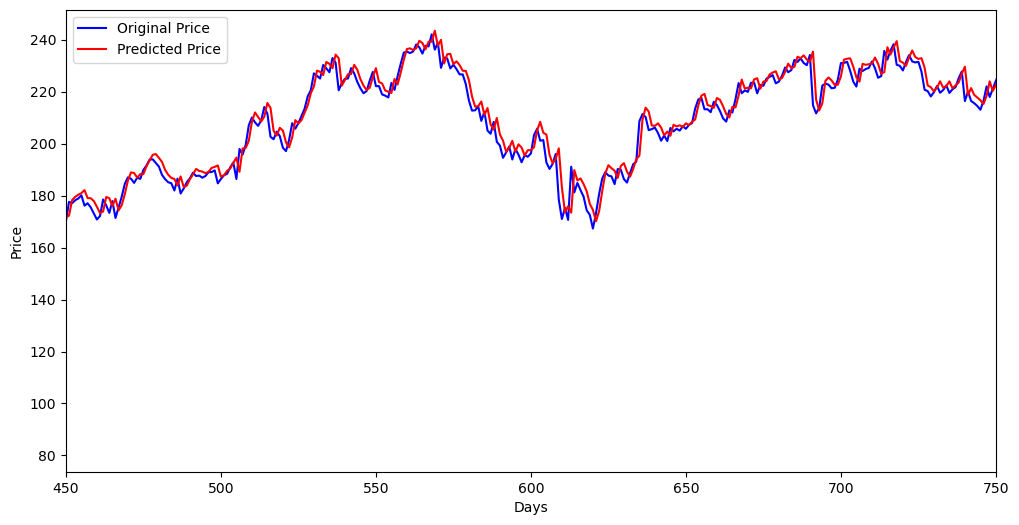

In [86]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b' ,label='Original Price')
plt.plot(y_predicted, 'r',label='Predicted Price')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.xlim(450, 750)


# 10. Model Evaluation

In [93]:
#Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error, r2_score

In [89]:
mse = mean_squared_error(y_test, y_predicted)
print(f'Mean Square Error (MSE):{mse}')

Mean Square Error (MSE):14.326556222182422


In [92]:
# Root Mean Square Error (RMSE)
rmse = np.sqrt(mse)
print(f'Root Mean Square Error (RMSE):{rmse}')

Root Mean Square Error (RMSE):3.785043754328663


In [94]:
# R-squared
r2 = r2_score(y_test, y_predicted)
print(f"R-Square: {r2}")

R-Square: 0.9930151011872252
